# Manipular datos

Julia has an increasingly compelling story for data analysis, based around the `DataFrames.jl`, `Query.jl`, and `JuliaDB.jl` packages.  

There is now a variety of packages for loading different file formats, many integrated into the `FileIO.jl` package, which loads a file based on its type.

Note that Excel files may be read using the [ExcelReaders.jl](https://github.com/davidanthoff/ExcelReaders.jl) package.

There is a recent book "Data Science with Julia" by McNicholas & Tait.

## Leer CSVs

Bajemos unos datos de temperatura en el DF: 


In [2]:
download("http://dsiappsdev.semarnat.gob.mx/datos/indicadores/dambiental/Atm%C3%B3sfera/Cambio%20clim%C3%A1tico/emision%20nacional%20de%20gases%20y%20compuestos%20de%20efecto%20invernadero.csv",
        "invernadero.csv")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4764  100  4764    0     0  99051      0 --:--:-- --:--:-- --:--:-- 99250


"invernadero.csv"

Leemos los datos con el paquete `CSV.jl`. Primero lo cargamos:

In [3]:
using CSV

Si te dice que no está instalado, lo tendrás que instalar, siguiendo las instrucciones que ahí vienen.

Ahora leemos los datos con la función `read` del paquete `CSV`:

In [4]:
datos = CSV.read("invernadero.csv", normalize_names=true)

,AÑO,SECTOR DE EMISION,GASES_DE_EFECTO_INVERNADERO_(GIGAGRAMOS_DE_BIOXIDO_DE_CARBONO_EQUIVALENTE),CARBONO_NEGRO_(GIGAGRAMOS_DE_BIOXIDO_DE_CARBONO_EQUIVALENTE)
,Int64⍰,String⍰,Int64⍰,Missing
1,1990,Energia,301473,missing
2,1991,Energia,312891,missing
3,1992,Energia,314129,missing
4,1993,Energia,315687,missing
5,1994,Energia,333517,missing
6,1995,Energia,323169,missing
7,1996,Energia,341874,missing
8,1997,Energia,363443,missing
9,1998,Energia,385391,missing


In [28]:
using DataFrames

In [30]:
?rename!

search: rename! rename propertynames



Rename columns

```julia
rename!(df::AbstractDataFrame, (from => to)::Pair{Symbol, Symbol}...)
rename!(df::AbstractDataFrame, d::AbstractDict{Symbol,Symbol})
rename!(df::AbstractDataFrame, d::AbstractArray{Pair{Symbol,Symbol}})
rename!(f::Function, df::AbstractDataFrame)
rename(df::AbstractDataFrame, (from => to)::Pair{Symbol, Symbol}...)
rename(df::AbstractDataFrame, d::AbstractDict{Symbol,Symbol})
rename(df::AbstractDataFrame, d::AbstractArray{Pair{Symbol,Symbol}})
rename(f::Function, df::AbstractDataFrame)
```

**Arguments**

  * `df` : the AbstractDataFrame
  * `d` : an Associative type or an AbstractArray of pairs that maps the original names to new names
  * `f` : a function which for each column takes the old name (a Symbol) and returns the new name (a Symbol)

**Result**

  * `::AbstractDataFrame` : the updated result

New names are processed sequentially. A new name must not already exist in the `DataFrame` at the moment an attempt to rename a column is performed.

**Examples**

```julia
df = DataFrame(i = 1:10, x = rand(10), y = rand(["a", "b", "c"], 10))
rename(df, :i => :A, :x => :X)
rename(df, [:i => :A, :x => :X])
rename(df, Dict(:i => :A, :x => :X))
rename(x -> Symbol(uppercase(string(x))), df)
rename(df) do x
    Symbol(uppercase(string(x)))
end
rename!(df, Dict(:i =>: A, :x => :X))
```


In [34]:
names(datos)

4-element Array{Symbol,1}:
 :AÑO                                                                                
 Symbol("SECTOR DE EMISION")                                                         
 Symbol("GASES_DE_EFECTO_INVERNADERO_(GIGAGRAMOS_DE_BIOXIDO_DE_CARBONO_EQUIVALENTE)")
 Symbol("CARBONO_NEGRO_(GIGAGRAMOS_DE_BIOXIDO_DE_CARBONO_EQUIVALENTE)")              

In [35]:
?rename!

search: rename! rename propertynames



Rename columns

```julia
rename!(df::AbstractDataFrame, (from => to)::Pair{Symbol, Symbol}...)
rename!(df::AbstractDataFrame, d::AbstractDict{Symbol,Symbol})
rename!(df::AbstractDataFrame, d::AbstractArray{Pair{Symbol,Symbol}})
rename!(f::Function, df::AbstractDataFrame)
rename(df::AbstractDataFrame, (from => to)::Pair{Symbol, Symbol}...)
rename(df::AbstractDataFrame, d::AbstractDict{Symbol,Symbol})
rename(df::AbstractDataFrame, d::AbstractArray{Pair{Symbol,Symbol}})
rename(f::Function, df::AbstractDataFrame)
```

**Arguments**

  * `df` : the AbstractDataFrame
  * `d` : an Associative type or an AbstractArray of pairs that maps the original names to new names
  * `f` : a function which for each column takes the old name (a Symbol) and returns the new name (a Symbol)

**Result**

  * `::AbstractDataFrame` : the updated result

New names are processed sequentially. A new name must not already exist in the `DataFrame` at the moment an attempt to rename a column is performed.

**Examples**

```julia
df = DataFrame(i = 1:10, x = rand(10), y = rand(["a", "b", "c"], 10))
rename(df, :i => :A, :x => :X)
rename(df, [:i => :A, :x => :X])
rename(df, Dict(:i => :A, :x => :X))
rename(x -> Symbol(uppercase(string(x))), df)
rename(df) do x
    Symbol(uppercase(string(x)))
end
rename!(df, Dict(:i =>: A, :x => :X))
```


Cambiar el nombre de una columna:

In [39]:
DataFrames.rename!(datos, Dict(names(datos)[3] => Symbol("gases invernaderos"), names(datos)[2] => Symbol("sector")))


,AÑO,sector,gases invernaderos,CARBONO_NEGRO_(GIGAGRAMOS_DE_BIOXIDO_DE_CARBONO_EQUIVALENTE)
,Int64⍰,String⍰,Int64⍰,Missing
1,1990,Energia,301473,missing
2,1991,Energia,312891,missing
3,1992,Energia,314129,missing
4,1993,Energia,315687,missing
5,1994,Energia,333517,missing
6,1995,Energia,323169,missing
7,1996,Energia,341874,missing
8,1997,Energia,363443,missing
9,1998,Energia,385391,missing


In [5]:
datos[1]

130-element Array{Union{Missing, Int64},1}:
 1990
 1991
 1992
 1993
 1994
 1995
 1996
 1997
 1998
 1999
 2000
 2001
 2002
    ⋮
 2004
 2005
 2006
 2007
 2008
 2009
 2010
 2011
 2012
 2013
 2014
 2015

In [8]:
count(ismissing, datos[1])

0

In [7]:
collect(skipmissing(datos[1]))

130-element Array{Int64,1}:
 1990
 1991
 1992
 1993
 1994
 1995
 1996
 1997
 1998
 1999
 2000
 2001
 2002
    ⋮
 2004
 2005
 2006
 2007
 2008
 2009
 2010
 2011
 2012
 2013
 2014
 2015

In [10]:
size(datos)

(130, 4)

Extraer un renglón:

In [11]:
datos[26, :]

,AÑO,SECTOR DE EMISION,GASES_DE_EFECTO_INVERNADERO_(GIGAGRAMOS_DE_BIOXIDO_DE_CARBONO_EQUIVALENTE),CARBONO_NEGRO_(GIGAGRAMOS_DE_BIOXIDO_DE_CARBONO_EQUIVALENTE)
,Int64⍰,String⍰,Int64⍰,Missing
26,2015,Energia,480879,missing


Extraer una columna:

In [12]:
datos[2]

130-element Array{Union{Missing, String},1}:
 "Energia"        
 "Energia"        
 "Energia"        
 "Energia"        
 "Energia"        
 "Energia"        
 "Energia"        
 "Energia"        
 "Energia"        
 "Energia"        
 "Energia"        
 "Energia"        
 "Energia"        
 ⋮                
 "Emisiones netas"
 "Emisiones netas"
 "Emisiones netas"
 "Emisiones netas"
 "Emisiones netas"
 "Emisiones netas"
 "Emisiones netas"
 "Emisiones netas"
 "Emisiones netas"
 "Emisiones netas"
 "Emisiones netas"
 "Emisiones netas"

¿Cómo podemos seleccionar sólo los renglones correspondientes a emisiones?

In [26]:
datos[2] .== "Emisiones netas"  # `==` verifica igualdad; `.` aplica una función elemento por elemento

130-element BitArray{1}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
     ⋮
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true

In [19]:
emisiones = datos[datos[2] .== "Emisiones netas", :]  # restringir
energía = datos[datos[2] .== "Energia", :]  # restringir

,AÑO,SECTOR DE EMISION,GASES_DE_EFECTO_INVERNADERO_(GIGAGRAMOS_DE_BIOXIDO_DE_CARBONO_EQUIVALENTE),CARBONO_NEGRO_(GIGAGRAMOS_DE_BIOXIDO_DE_CARBONO_EQUIVALENTE)
,Int64⍰,String⍰,Int64⍰,Missing
1,1990,Energia,301473,missing
2,1991,Energia,312891,missing
3,1992,Energia,314129,missing
4,1993,Energia,315687,missing
5,1994,Energia,333517,missing
6,1995,Energia,323169,missing
7,1996,Energia,341874,missing
8,1997,Energia,363443,missing
9,1998,Energia,385391,missing


In [45]:
DataFrames.deletecols!(datos, 4)

,AÑO,sector,gases invernaderos
,Int64⍰,String⍰,Int64⍰
1,1990,Energia,301473
2,1991,Energia,312891
3,1992,Energia,314129
4,1993,Energia,315687
5,1994,Energia,333517
6,1995,Energia,323169
7,1996,Energia,341874
8,1997,Energia,363443
9,1998,Energia,385391


In [16]:
using Plots

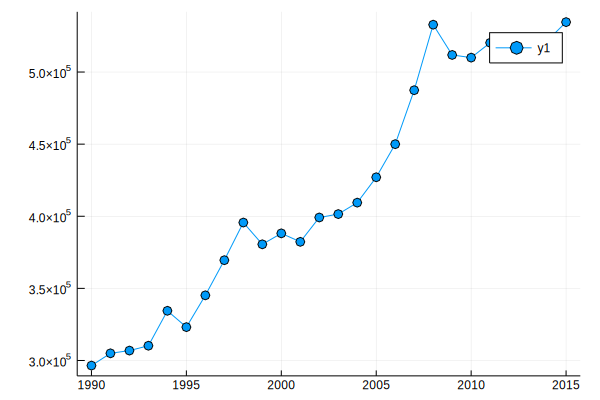

In [18]:
plot(emisiones[1], emisiones[3], m=:o)

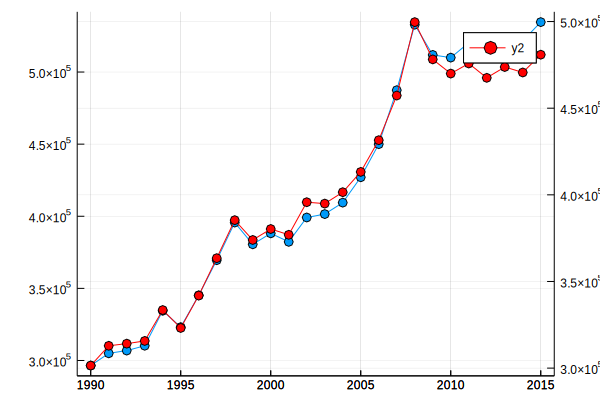

In [20]:
plt = twinx()  # dos ejes y
plot!(plt, energía[1], energía[3], color=:red, m=:o)

In [37]:
Datos faltantes se representan con `missing`:

LoadError: syntax: extra token "faltantes" after end of expression

In [21]:
v= [1, 2, missing]

3-element Array{Union{Missing, Int64},1}:
 1       
 2       
  missing

In [22]:
collect(skipmissing(v))

2-element Array{Int64,1}:
 1
 2

## Manipular los datos

¿Cuáles sectores están presentes?

In [25]:
sectores = unique(datos[2])

5-element Array{Union{Missing, String},1}:
 "Energia"                                            
 "Procesos industriales"                              
 "Agricultura, silvicultura y otros usos de la tierra"
 "Residuos"                                           
 "Emisiones netas"                                    

## Querying a database using `Query.jl`

The syntax for the above kind of operation gets very messy very fast, so we instead turn to a more powerful tool, `Query.jl`, which provides a syntax based on C#'s LINQ:

In [41]:
using Query, DataFrames

┌ Info: Precompiling Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1186


In [40]:
@from v in datos begin
     @where v.sector == "Energia"
     @select v
     @collect DataFrame
end

LoadError: UndefVarError: @from not defined

Hagamos interactivo cuál sector queramos: 

In [42]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/a1b73b8a610c7572f4a81a27d42ecc3e3a054c7e-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/a1b73b8a610c7572f4a81a27d42ecc3e3a054c7e-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [47]:
@manipulate for i in slider(1:length(sectores), value=1)

    datos_reducidos = @from v in datos begin
         @where v.sector == sectores[i]
         @select v
         @collect DataFrame
    end
        
    hbox(datos_reducidos, 
        plot(datos_reducidos[1], datos_reducidos[3])
    )
    
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
1), Observable{Int64} with 2 listeners. Value:
1, Scope("knockout-component-19012371-ac15-48c8-afa2-9625818b7420", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>5,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/dpsanders/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-19012371-ac15-48c8-afa2-9625818b7420\",\"id\":\"ob_12\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-19012371-ac15-48c8-afa2-9625818b7420\",\"id\":\"ob_11\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n  

## JuliaDB

Another recent development in the data space is `JuliaDB.jl`, an efficient key-value store written in pure Julia. It is fully typed and hence more efficient than standard `DataFrame`s.